In [ ]:
# Gọi thư viện liên quan đến phân tích dữ liệu
import numpy as np # làm việc với các array
import pandas as pd # làm việc với các dataframe

In [ ]:
# Kéo dữ liệu vào Python

data = pd.read_csv("sales_data.csv")
data.head(10)

,Month,Week,CustomerCode,Branch,Channel,SKU,QTY,COGS,NetAmount
0,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500DEN39,2.0,394400.0,528960.0
1,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500DEN40,1.0,197200.0,264480.0
2,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH39,2.0,394400.0,528960.0
3,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH40,1.0,197200.0,264480.0
4,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH41,1.0,197200.0,264480.0
5,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH42,1.0,197200.0,264480.0
6,2021001.0,202101.0,20000210,2001.0,TGPP,DRM038500XNH43,1.0,197200.0,264480.0
7,2021001.0,202101.0,20000210,2001.0,TGPP,DTW009788DEN37,2.0,312800.0,419520.0
8,2021001.0,202101.0,20000210,2001.0,TGPP,DTW009788DEN38,2.0,312800.0,419520.0
9,2021001.0,202101.0,20000210,2001.0,TGPP,DTW009788DEN39,2.0,312800.0,419520.0


In [ ]:
# Kiểm tra dạng dữ diệu (bỏ qua cũng được)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138046 entries, 0 to 12138045
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Month         float64
 1   Week          float64
 2   CustomerCode  object 
 3   Branch        float64
 4   Channel       object 
 5   SKU           object 
 6   QTY           float64
 7   COGS          float64
 8   NetAmount     float64
dtypes: float64(6), object(3)
memory usage: 833.5+ MB


In [ ]:
data = data[["Week","QTY"]]
data.head(10)

,Week,QTY
0,202101.0,2.0
1,202101.0,1.0
2,202101.0,2.0
3,202101.0,1.0
4,202101.0,1.0
5,202101.0,1.0
6,202101.0,1.0
7,202101.0,2.0
8,202101.0,2.0
9,202101.0,2.0


In [ ]:
data = data.sort_values(by='Week',ascending=True)

In [ ]:
data = data.groupby('Week', as_index=False)['QTY'].sum()

In [ ]:
data.head(13)

,Week,QTY
0,202101.0,107765.0
1,202102.0,205638.0
2,202103.0,213465.0
3,202104.0,162789.0
4,202105.0,153905.0
5,202106.0,233059.0
6,202107.0,108123.0
7,202108.0,67773.0
8,202109.0,56011.0
9,202110.0,123253.0


In [ ]:
fcst_chtt = data[["QTY"]]
fcst_chtt

,QTY
0,107765.0
1,205638.0
2,213465.0
3,162789.0
4,153905.0
...,...
131,188817.0
132,131488.0
133,124567.0
134,105870.0


In [ ]:
time = np.arange(1,len(fcst_chtt.index)+1)

In [ ]:
#Data sẽ đưa cho máy học

fcst_chtt["Time"]=time
fcst_chtt

,QTY,Time
0,107765.0,1
1,205638.0,2
2,213465.0,3
3,162789.0,4
4,153905.0,5
...,...,...
131,188817.0,132
132,131488.0,133
133,124567.0,134
134,105870.0,135


In [ ]:
# 2 biến đầu vào và đầu ra

X = np.array(fcst_chtt["Time"]).reshape(-1, 1)
y = fcst_chtt["QTY"]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Perform linear regression
lin_reg = LinearRegression()

lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)

# Get the slope and intercept as floats
m = float(lin_reg.coef_)
c = float(lin_reg.intercept_)

C:\Users\thanh\AppData\Local\Temp\ipykernel_18236\4267940829.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = float(lin_reg.coef_)


In [ ]:
fcst_chtt2 = fcst_chtt
fcst_chtt2["Forecast"] = y_pred
fcst_chtt2

,QTY,Time,Forecast
0,107765.0,1,122232.090919
1,205638.0,2,122331.993929
2,213465.0,3,122431.896940
3,162789.0,4,122531.799950
4,153905.0,5,122631.702960
...,...,...,...
131,188817.0,132,135319.385275
132,131488.0,133,135419.288285
133,124567.0,134,135519.191296
134,105870.0,135,135619.094306


C:\Users\thanh\AppData\Local\Temp\ipykernel_18236\930479949.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = float(lin_reg.coef_)


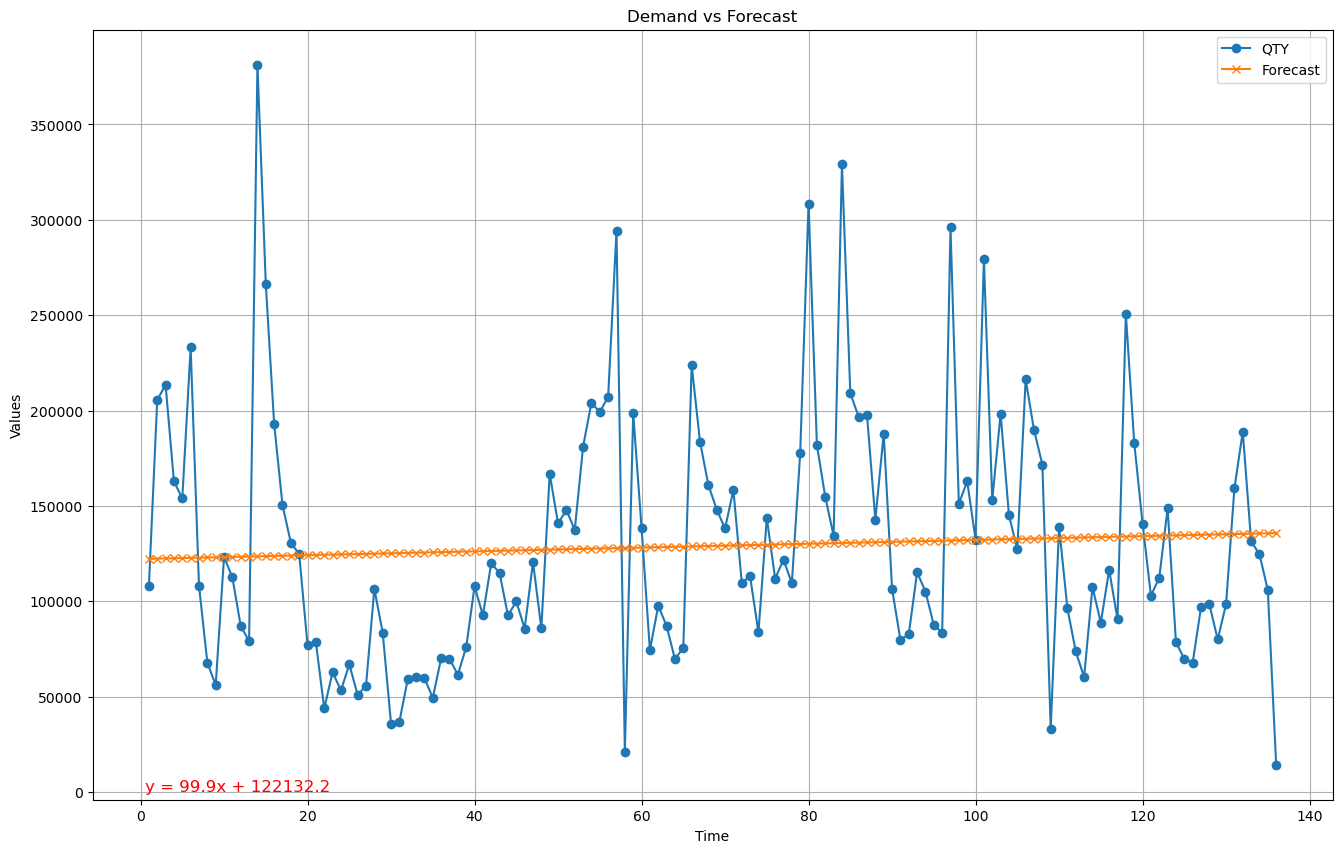

In [ ]:
# Plotting the data
plt.figure(figsize=(16, 10))

plt.plot(fcst_chtt2['Time'], fcst_chtt2['QTY'], label='QTY', marker='o')
plt.plot(fcst_chtt2['Time'], fcst_chtt2['Forecast'], label='Forecast', marker='x')

m = float(lin_reg.coef_)
c = float(lin_reg.intercept_)
formula = f'y = {m:.1f}x + {c:.1f}'
plt.text(0.5, 12, formula, fontsize=12, color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Demand vs Forecast')

# Displaying the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()